# README MAKER

## Admin/Prep

In [161]:
# Chagne dir to match final README location
import os
if '.git' not in os.listdir():
    os.chdir("../")
os.getcwd()

'/Users/codingdojo/Documents/GitHub/_MY_PROJECTS/computer-vision-american-sign-language'

In [162]:
import os, json
from IPython.display import Markdown

config_file ="config/filepaths.json"
with open(config_file) as f:
    FPATHS = json.load(f)
FPATHS.keys()

dict_keys(['data', 'images', 'eda', 'modeling', 'readme'])

In [163]:
FPATHS['readme']

{'results_table_md': 'modeling/results_table.md'}

In [164]:
# Custom functions:
%load_ext autoreload
%autoreload 2
# sys.path.append(os.path.abspath("../../"))
import custom_functions as cf
# dir(cf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Prepare Results Table

In [165]:
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'],clean_results=True, remove_fpaths=False)
logs_df.insert(0,'Rank',logs_df['Accuracy'].rank(ascending=False).astype(int))
logs_df = logs_df.set_index("Rank")
logs_df
logs_df



[i] Saved parsed logs to modeling/nn_training.csv


,Start Time,Name,Precision,Recall,F1-Score,Accuracy,Save Classification Report Fpath,Save History Fpath,Save Confusion Matrix Fpath,Fit Time,Model Save Fpath
Rank,,,,,,,,,,,
5,06/03/2024 12:22:14,towards-data-science,0.386,0.318,0.316,0.342,modeling/models/towards-data-science/classific...,modeling/models/towards-data-science/history.png,modeling/models/towards-data-science/confusion...,0:01:43.888912,modeling/models/towards-data-science
6,06/03/2024 12:24:25,towards-data-science_lr-schedule,0.312,0.288,0.271,0.294,modeling/models/towards-data-science_lr-schedu...,modeling/models/towards-data-science_lr-schedu...,modeling/models/towards-data-science_lr-schedu...,0:04:23.701543,modeling/models/towards-data-science_lr-schedule
3,06/03/2024 12:28:55,cnn1-fixed-lr,0.355,0.359,0.347,0.368,modeling/models/cnn1-fixed-lr/classification_r...,modeling/models/cnn1-fixed-lr/history.png,modeling/models/cnn1-fixed-lr/confusion_matrix...,0:00:21.583943,modeling/models/cnn1-fixed-lr
3,06/03/2024 12:29:21,cnn1-scheduled-lr,0.355,0.359,0.346,0.368,modeling/models/cnn1-scheduled-lr/classificati...,modeling/models/cnn1-scheduled-lr/history.png,modeling/models/cnn1-scheduled-lr/confusion_ma...,0:00:22.408392,modeling/models/cnn1-scheduled-lr
2,06/03/2024 12:29:51,VGG16-01,0.539,0.534,0.518,0.535,modeling/models/VGG16-01/classification_report...,modeling/models/VGG16-01/history.png,modeling/models/VGG16-01/confusion_matrix.png,0:01:55.297751,modeling/models/VGG16-01
1,06/03/2024 12:31:58,EfficientNetB0-1,0.772,0.769,0.754,0.763,modeling/models/EfficientNetB0-1/classificatio...,modeling/models/EfficientNetB0-1/history.png,modeling/models/EfficientNetB0-1/confusion_mat...,0:02:04.131142,modeling/models/EfficientNetB0-1


In [166]:
best_model = logs_df.loc[1]
best_model

Start Time                                                        06/03/2024 12:31:58
Name                                                                 EfficientNetB0-1
Precision                                                                       0.772
Recall                                                                          0.769
F1-Score                                                                        0.754
Accuracy                                                                        0.763
Save Classification Report Fpath    modeling/models/EfficientNetB0-1/classificatio...
Save History Fpath                       modeling/models/EfficientNetB0-1/history.png
Save Confusion Matrix Fpath         modeling/models/EfficientNetB0-1/confusion_mat...
Fit Time                                                               0:02:04.131142
Model Save Fpath                                     modeling/models/EfficientNetB0-1
Name: 1, dtype: object

In [167]:
## PREPARE README TABLE
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'])
# logs_df = parse_log_file(log_file,clean_results=True      )
readme_logs = logs_df.drop(columns=['Start Time'], errors='ignore')
readme_logs = readme_logs.sort_values('Accuracy', ascending=False)
readme_logs.insert(0,'Rank',readme_logs['Accuracy'].rank(ascending=False).astype(int))
# readme_logs = readme_logs.set_index(['Rank','Name'])
readme_logs


[i] Saved parsed logs to modeling/nn_training.csv


,Rank,Name,Precision,Recall,F1-Score,Accuracy,Fit Time,Model Save Fpath
5,1,EfficientNetB0-1,0.772,0.769,0.754,0.763,0:02:04.131142,modeling/models/EfficientNetB0-1
4,2,VGG16-01,0.539,0.534,0.518,0.535,0:01:55.297751,modeling/models/VGG16-01
2,3,cnn1-fixed-lr,0.355,0.359,0.347,0.368,0:00:21.583943,modeling/models/cnn1-fixed-lr
3,3,cnn1-scheduled-lr,0.355,0.359,0.346,0.368,0:00:22.408392,modeling/models/cnn1-scheduled-lr
0,5,towards-data-science,0.386,0.318,0.316,0.342,0:01:43.888912,modeling/models/towards-data-science
1,6,towards-data-science_lr-schedule,0.312,0.288,0.271,0.294,0:04:23.701543,modeling/models/towards-data-science_lr-schedule


In [168]:
# # Save best model results as vars
# classification_logs_df.loc[1]

In [169]:
## save readme lgos
results_md_file = FPATHS['readme']['results_table_md']
readme_logs.to_markdown(results_md_file, index=False)

with open(results_md_file,'r') as f:
    display(Markdown(f.read()))

|   Rank | Name                             |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                                 |
|-------:|:---------------------------------|------------:|---------:|-----------:|-----------:|:---------------|:-------------------------------------------------|
|      1 | EfficientNetB0-1                 |       0.772 |    0.769 |      0.754 |      0.763 | 0:02:04.131142 | modeling/models/EfficientNetB0-1                 |
|      2 | VGG16-01                         |       0.539 |    0.534 |      0.518 |      0.535 | 0:01:55.297751 | modeling/models/VGG16-01                         |
|      3 | cnn1-fixed-lr                    |       0.355 |    0.359 |      0.347 |      0.368 | 0:00:21.583943 | modeling/models/cnn1-fixed-lr                    |
|      3 | cnn1-scheduled-lr                |       0.355 |    0.359 |      0.346 |      0.368 | 0:00:22.408392 | modeling/models/cnn1-scheduled-lr                |
|      5 | towards-data-science             |       0.386 |    0.318 |      0.316 |      0.342 | 0:01:43.888912 | modeling/models/towards-data-science             |
|      6 | towards-data-science_lr-schedule |       0.312 |    0.288 |      0.271 |      0.294 | 0:04:23.701543 | modeling/models/towards-data-science_lr-schedule |

### Save Figures for f-strings

In [170]:
FPATHS['eda']

{'label-distrubtion-countplot_png': 'images/label-distribution-countplot.png',
 'test-labels-distrubtion_png': 'images/test-label-distribution-countplot.png',
 'example-images_png': 'images/ed_example_letters.png',
 'lime-explanation_png': 'images/lime-explanation.png',
 'lime-explanation-wrong_png': 'images/lime-explanation-wrong.png',
 'lime-explanation-right_png': 'images/lime-explanation-right.png'}

In [171]:
# Save figure fpaths for f-strings
eda_class_balance = FPATHS['eda']['label-distrubtion-countplot_png']
eda_example_letters = FPATHS['eda']['example-images_png']
print(eda_example_letters, eda_class_balance)

images/ed_example_letters.png images/label-distribution-countplot.png


In [172]:
os.getcwd()

'/Users/codingdojo/Documents/GitHub/_MY_PROJECTS/computer-vision-american-sign-language'

In [173]:
os.path.exists(eda_class_balance),os.path.exists(eda_example_letters)

(True, True)

## README CONTENT

In [174]:
import datetime as dt
intro= f"""
# computer-vision-american-sign-language

-  Last Updated: {dt.date.today().strftime("%m/%d/%Y")}

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="{eda_example_letters}">


## EDA



### Class Balance




<img src="{eda_class_balance}">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.


"""

# #### TO DO:

# - [x] Apply transfer learning
# - [x] Save best model for deployment
# = [ ] Apply LimeExplainer with best model.
# - [ ] Tune the best architecture with keras tuner.
# - [ ] Create a streamlit application for live inference.

Markdown(intro)


# computer-vision-american-sign-language

-  Last Updated: 06/03/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




In [175]:
readme_part1_fpath = "config/readme_part1.md"

with open(readme_part1_fpath, 'w') as f:
    f.write(intro)

with open(readme_part1_fpath) as f:

    display(Markdown(f.read()))


# computer-vision-american-sign-language

-  Last Updated: 06/03/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




### Generate Resuls Programmatically from logs

In [176]:
# import pandas as pd
# # pd.read_table(results_table_md)
# readme_logs.set_index("Rank")

In [177]:
with open(results_md_file,'r') as f:
    results_table_md = f.read()

results_table_md

'|   Rank | Name                             |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                                 |\n|-------:|:---------------------------------|------------:|---------:|-----------:|-----------:|:---------------|:-------------------------------------------------|\n|      1 | EfficientNetB0-1                 |       0.772 |    0.769 |      0.754 |      0.763 | 0:02:04.131142 | modeling/models/EfficientNetB0-1                 |\n|      2 | VGG16-01                         |       0.539 |    0.534 |      0.518 |      0.535 | 0:01:55.297751 | modeling/models/VGG16-01                         |\n|      3 | cnn1-fixed-lr                    |       0.355 |    0.359 |      0.347 |      0.368 | 0:00:21.583943 | modeling/models/cnn1-fixed-lr                    |\n|      3 | cnn1-scheduled-lr                |       0.355 |    0.359 |      0.346 |      0.368 | 0:00:22.408392 | modeling/models/cnn1-scheduled-lr                |\n|  

#### Saving Best Model

In [178]:
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'],clean_results=True, remove_fpaths=False)
logs_df.insert(0,'Rank',logs_df['Accuracy'].rank(ascending=False).astype(int))
logs_df = logs_df.set_index("Rank")
logs_df
logs_df



[i] Saved parsed logs to modeling/nn_training.csv


,Start Time,Name,Precision,Recall,F1-Score,Accuracy,Save Classification Report Fpath,Save History Fpath,Save Confusion Matrix Fpath,Fit Time,Model Save Fpath
Rank,,,,,,,,,,,
5,06/03/2024 12:22:14,towards-data-science,0.386,0.318,0.316,0.342,modeling/models/towards-data-science/classific...,modeling/models/towards-data-science/history.png,modeling/models/towards-data-science/confusion...,0:01:43.888912,modeling/models/towards-data-science
6,06/03/2024 12:24:25,towards-data-science_lr-schedule,0.312,0.288,0.271,0.294,modeling/models/towards-data-science_lr-schedu...,modeling/models/towards-data-science_lr-schedu...,modeling/models/towards-data-science_lr-schedu...,0:04:23.701543,modeling/models/towards-data-science_lr-schedule
3,06/03/2024 12:28:55,cnn1-fixed-lr,0.355,0.359,0.347,0.368,modeling/models/cnn1-fixed-lr/classification_r...,modeling/models/cnn1-fixed-lr/history.png,modeling/models/cnn1-fixed-lr/confusion_matrix...,0:00:21.583943,modeling/models/cnn1-fixed-lr
3,06/03/2024 12:29:21,cnn1-scheduled-lr,0.355,0.359,0.346,0.368,modeling/models/cnn1-scheduled-lr/classificati...,modeling/models/cnn1-scheduled-lr/history.png,modeling/models/cnn1-scheduled-lr/confusion_ma...,0:00:22.408392,modeling/models/cnn1-scheduled-lr
2,06/03/2024 12:29:51,VGG16-01,0.539,0.534,0.518,0.535,modeling/models/VGG16-01/classification_report...,modeling/models/VGG16-01/history.png,modeling/models/VGG16-01/confusion_matrix.png,0:01:55.297751,modeling/models/VGG16-01
1,06/03/2024 12:31:58,EfficientNetB0-1,0.772,0.769,0.754,0.763,modeling/models/EfficientNetB0-1/classificatio...,modeling/models/EfficientNetB0-1/history.png,modeling/models/EfficientNetB0-1/confusion_mat...,0:02:04.131142,modeling/models/EfficientNetB0-1


In [179]:
best_model = logs_df.loc[1]
best_model

Start Time                                                        06/03/2024 12:31:58
Name                                                                 EfficientNetB0-1
Precision                                                                       0.772
Recall                                                                          0.769
F1-Score                                                                        0.754
Accuracy                                                                        0.763
Save Classification Report Fpath    modeling/models/EfficientNetB0-1/classificatio...
Save History Fpath                       modeling/models/EfficientNetB0-1/history.png
Save Confusion Matrix Fpath         modeling/models/EfficientNetB0-1/confusion_mat...
Fit Time                                                               0:02:04.131142
Model Save Fpath                                     modeling/models/EfficientNetB0-1
Name: 1, dtype: object

In [180]:
# os.getcwd()

In [181]:
# os.path.exists('modeling/models/towards-data-science_lr-schedule/classification_report.txt')

dict_keys(['classification_report', 'history_fig', 'confusion_matrix_fig'])

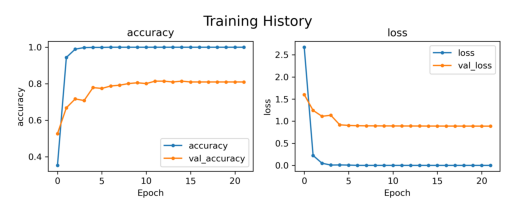

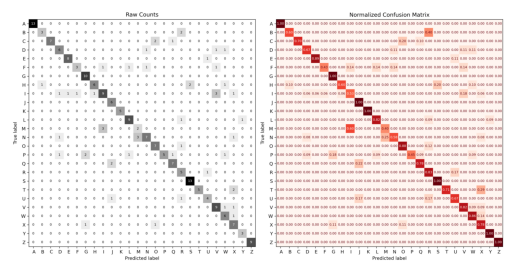

In [182]:
results = cf.logs.load_model_results(best_model["Name"], model_directory = FPATHS['modeling']['model_dir'],load_model=False)
results.keys()

In [183]:
best_model['Model Save Fpath']

'modeling/models/EfficientNetB0-1'

In [184]:
# results = cf.logs.load_model_results()

In [185]:
best_model_name = best_model['Name']
best_model_history_fpath= best_model['Save History Fpath']
best_model_classification_report_fpath =best_model['Save Classification Report Fpath']
with open(best_model_classification_report_fpath) as f:
    
    best_model_classification_report = f.read()
    
best_model_confusion_matrix_fpath =  best_model["Save Confusion Matrix Fpath"]
best_model_confusion_matrix_fpath

'modeling/models/EfficientNetB0-1/confusion_matrix.png'

In [186]:
os.path.exists(best_model_confusion_matrix_fpath)

True

In [187]:
best_model_history_fpath

'modeling/models/EfficientNetB0-1/history.png'

<img src='modeling/models/cnn1-fixed-lr/history.png'>

In [193]:
## OLD/CURRENT REULTS

results= f"""
## Results

{results_table_md}

### Best Model

- {best_model_name}


#### Test Results


<img src="{best_model_history_fpath}">

```
{best_model_classification_report}
```


<img src="{best_model_confusion_matrix_fpath}">


#### Example Explanations for Model Predictions (Comging Soon!)
> Placeholder for example explanation of correctly classified image.
> Placeholder for example explanation of incorrectly classified image.
> Placeholder for example explanation of the 2 clases most often confused for each other.
"""
Markdown(results)
# <img src="images/best_model_results_bar.png">
readme_part2_fpath = 'config/readme_part2_results.md'
with open(readme_part2_fpath,'w') as f:
    f.write(results)

### Part 3/Conclusion

In [189]:
conclusion ="""### To Dos:
- [x] Apply transfer learning
- [ ] Save best model for deployment `[Fix issue with EfficientNet and current tensorlfow!]`
- [ ] Tune the best architecture with keras tuner.
- [ ] Apply LimeExplainer with best model. 

- [ ] Deploy a streamlit application for live inference from images. 


### Future Work
>There are many more iterations to test for this task:
- [ ] Does image augmentation help the models?
- [ ] Does adding additional hiddden layers on top of EfficientNet improve performance?
- [ ] Does allowing the transfer learning models to train the convolutional base improve performance?


> **The next level of complextiy would be to add object detection for hands, followed by sign classification.**

## Summary
This project demonstrates proof-of-concept work classifying ASL alphabetical characters. Working with a 26-label classification model is tricky, but pales in comparison to what would be required to interpert whole ASL words.


"""

In [190]:
readme_part3_fpath = 'config/readme_part3_results.md'
with open(readme_part3_fpath,'w') as f:
    f.write(conclusion)

# Combine Into Final README

In [191]:
files_to_merge=  [readme_part1_fpath, readme_part2_fpath, readme_part3_fpath]
readme_text = ""
for file in files_to_merge:
    with open(file) as f:
        text = f.read()
        readme_text+="\n"+text
display(Markdown(readme_text))



# computer-vision-american-sign-language

-  Last Updated: 06/03/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




## Results

|   Rank | Name                             |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                                 |
|-------:|:---------------------------------|------------:|---------:|-----------:|-----------:|:---------------|:-------------------------------------------------|
|      1 | EfficientNetB0-1                 |       0.772 |    0.769 |      0.754 |      0.763 | 0:02:04.131142 | modeling/models/EfficientNetB0-1                 |
|      2 | VGG16-01                         |       0.539 |    0.534 |      0.518 |      0.535 | 0:01:55.297751 | modeling/models/VGG16-01                         |
|      3 | cnn1-fixed-lr                    |       0.355 |    0.359 |      0.347 |      0.368 | 0:00:21.583943 | modeling/models/cnn1-fixed-lr                    |
|      3 | cnn1-scheduled-lr                |       0.355 |    0.359 |      0.346 |      0.368 | 0:00:22.408392 | modeling/models/cnn1-scheduled-lr                |
|      5 | towards-data-science             |       0.386 |    0.318 |      0.316 |      0.342 | 0:01:43.888912 | modeling/models/towards-data-science             |
|      6 | towards-data-science_lr-schedule |       0.312 |    0.288 |      0.271 |      0.294 | 0:04:23.701543 | modeling/models/towards-data-science_lr-schedule |

### Best Model

- EfficientNetB0-1


#### Test Results


<img src="modeling/models/EfficientNetB0-1/history.png">

```
--------------------------------------------------------------------------------
 Classification Metrics: Test Data 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        13
           B       0.75      0.60      0.67         5
           C       1.00      0.70      0.82        10
           D       0.67      0.67      0.67         9
           E       0.89      0.89      0.89         9
           F       0.75      0.43      0.55         7
           G       0.77      1.00      0.87        10
           H       0.86      0.60      0.71        10
           I       0.69      0.53      0.60        17
           J       0.67      1.00      0.80         6
           K       1.00      1.00      1.00         5
           L       0.82      0.82      0.82        11
           M       0.40      0.40      0.40         5
           N       0.78      0.58      0.67        12
           O       0.70      0.88      0.78         8
           P       1.00      0.45      0.62        11
           Q       0.78      0.78      0.78         9
           R       0.50      0.83      0.62         6
           S       0.87      1.00      0.93        13
           T       1.00      0.71      0.83         7
           U       0.67      0.67      0.67         6
           V       0.64      0.82      0.72        11
           W       0.60      0.86      0.71         7
           X       0.54      0.78      0.64         9
           Y       0.75      1.00      0.86         3
           Z       1.00      1.00      1.00         9

    accuracy                           0.76       228
   macro avg       0.77      0.77      0.75       228
weighted avg       0.79      0.76      0.76       228

--------------------------------------------------------------------------------
```


<img src="modeling/models/EfficientNetB0-1/confusion_matrix.png">


#### Example Explanationsfor Model Predictions (Comging Soon!)
> Placeholder for example explanation of correctly classified image
> Placeholder for example explanation of incorrectly classified image
> Placeholder for example explanation of the 2 clases most often confused for each other.

### To Dos:
- [x] Apply transfer learning
- [ ] Save best model for deployment `[Fix issue with EfficientNet and current tensorlfow!]`
- [ ] Tune the best architecture with keras tuner.
- [ ] Apply LimeExplainer with best model. 

- [ ] Deploy a streamlit application for live inference from images. 


### Future Work
>There are many more iterations to test for this task:
- [ ] Does image augmentation help the models?
- [ ] Does adding additional hiddden layers on top of EfficientNet improve performance
- [ ] Does allowing the transfer learning models to train the convolutional base improve performance?

> **The next level of complextiy would be to add object detection for hands, followed by sign classification.**
## Summary
This project demonstrates proof-of-concept work classifying ASL alphabetical characters. Working with a 26-label classification model is tricky, but pales in comparison to what would be required to interpert whole ASL words.




In [192]:
if '.git' in os.listdir():
    print("Saving README")
    with open("README.md",'w') as f:
        f.write(readme_text)
else:
    raise Exception(".git not found")

Saving README
